In [1]:
from packaging import version
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
import tensorboard as tb
sns.set()

In [256]:
experiment_id = "DG7Mhd1NQyeoZXJuamx9EQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

In [ ]:
filenames = ["1_03-19_0214",
            "2_03-21_0032",
            "3_03-20_1345",
            "4_03-21_0032",
            "5_03-20_1345",
            "6_03-22_0355",
            "7_03-21_2102",
            "8_03-21_1410",
            "9_03-21_2102",
            "10_03-22_1626",
            "11_03-22_2345",
            "12_03-23_1533",
            "13_03-12_2134",
            "14_03-12_2134",
            "15_03-12_2134",
            "16_03-14_0840",
            "17_03-14_0840",
            "18_03-15_1223",
            "19_03-15_2150",
            "20_03-16_0800",
            "21_03-16_0849",
            "22_03-16_0933",
            "23_03-16_0933",
            "24_03-16_0948"]


env_size = [10,10,10,10,10,10,10,10,20,20,20,20,10,10,10,10,10,10,10,10,10,20,20,20]
buildings = [10,10,10,10,25,25,25,25,50,50,100,100,10,10,10,25,25,25,25,25,25,50,50,50]
dyn_obs = [0,0,10,10,0,0,10,10,25,25,25,25,0,0,0,0,0,0,10,10,10,25,25,25]

for i, f in enumerate(filenames):
    
    if i <= 8:
        l = 1
    else:
        l = 2

    data=[]

    for t in ["reward_avg", "reward_max", "reward_min", "step"]:
        data.append(np.array(df["value"][(df["run"] == f) & (df["tag"] == t)])[:400])
        
    print(max(data[0]), np.argmax(data[0])*25)

    x = np.array(range(len(data[0]))) * 25
    plt.plot(x, data[0], 'k-', label=f'Run {f[:l]}')
    plt.plot(x, [max(data[0])]*len(data[0]), 'g-', label=f'Maximum Average: {str(max(data[0]))[:5]}')
    plt.fill_between(x, data[2], data[1], color='gray', alpha=0.2)
    plt.legend()
    plt.xlabel('Epoch')  # Add an x-label to the axes.
    plt.ylim([-2,1])
    plt.ylabel('Reward')  # Add a y-label to the axes.
    plt.title(f"Run {f[:l]}: Env Size = {env_size[i]}, # Buildings = {buildings[i]}, # Dyn Obs = {dyn_obs[i]}")  # Add a title to the axes.
    plt.savefig(f"{f[:l]}.png", dpi=960)
    plt.show()

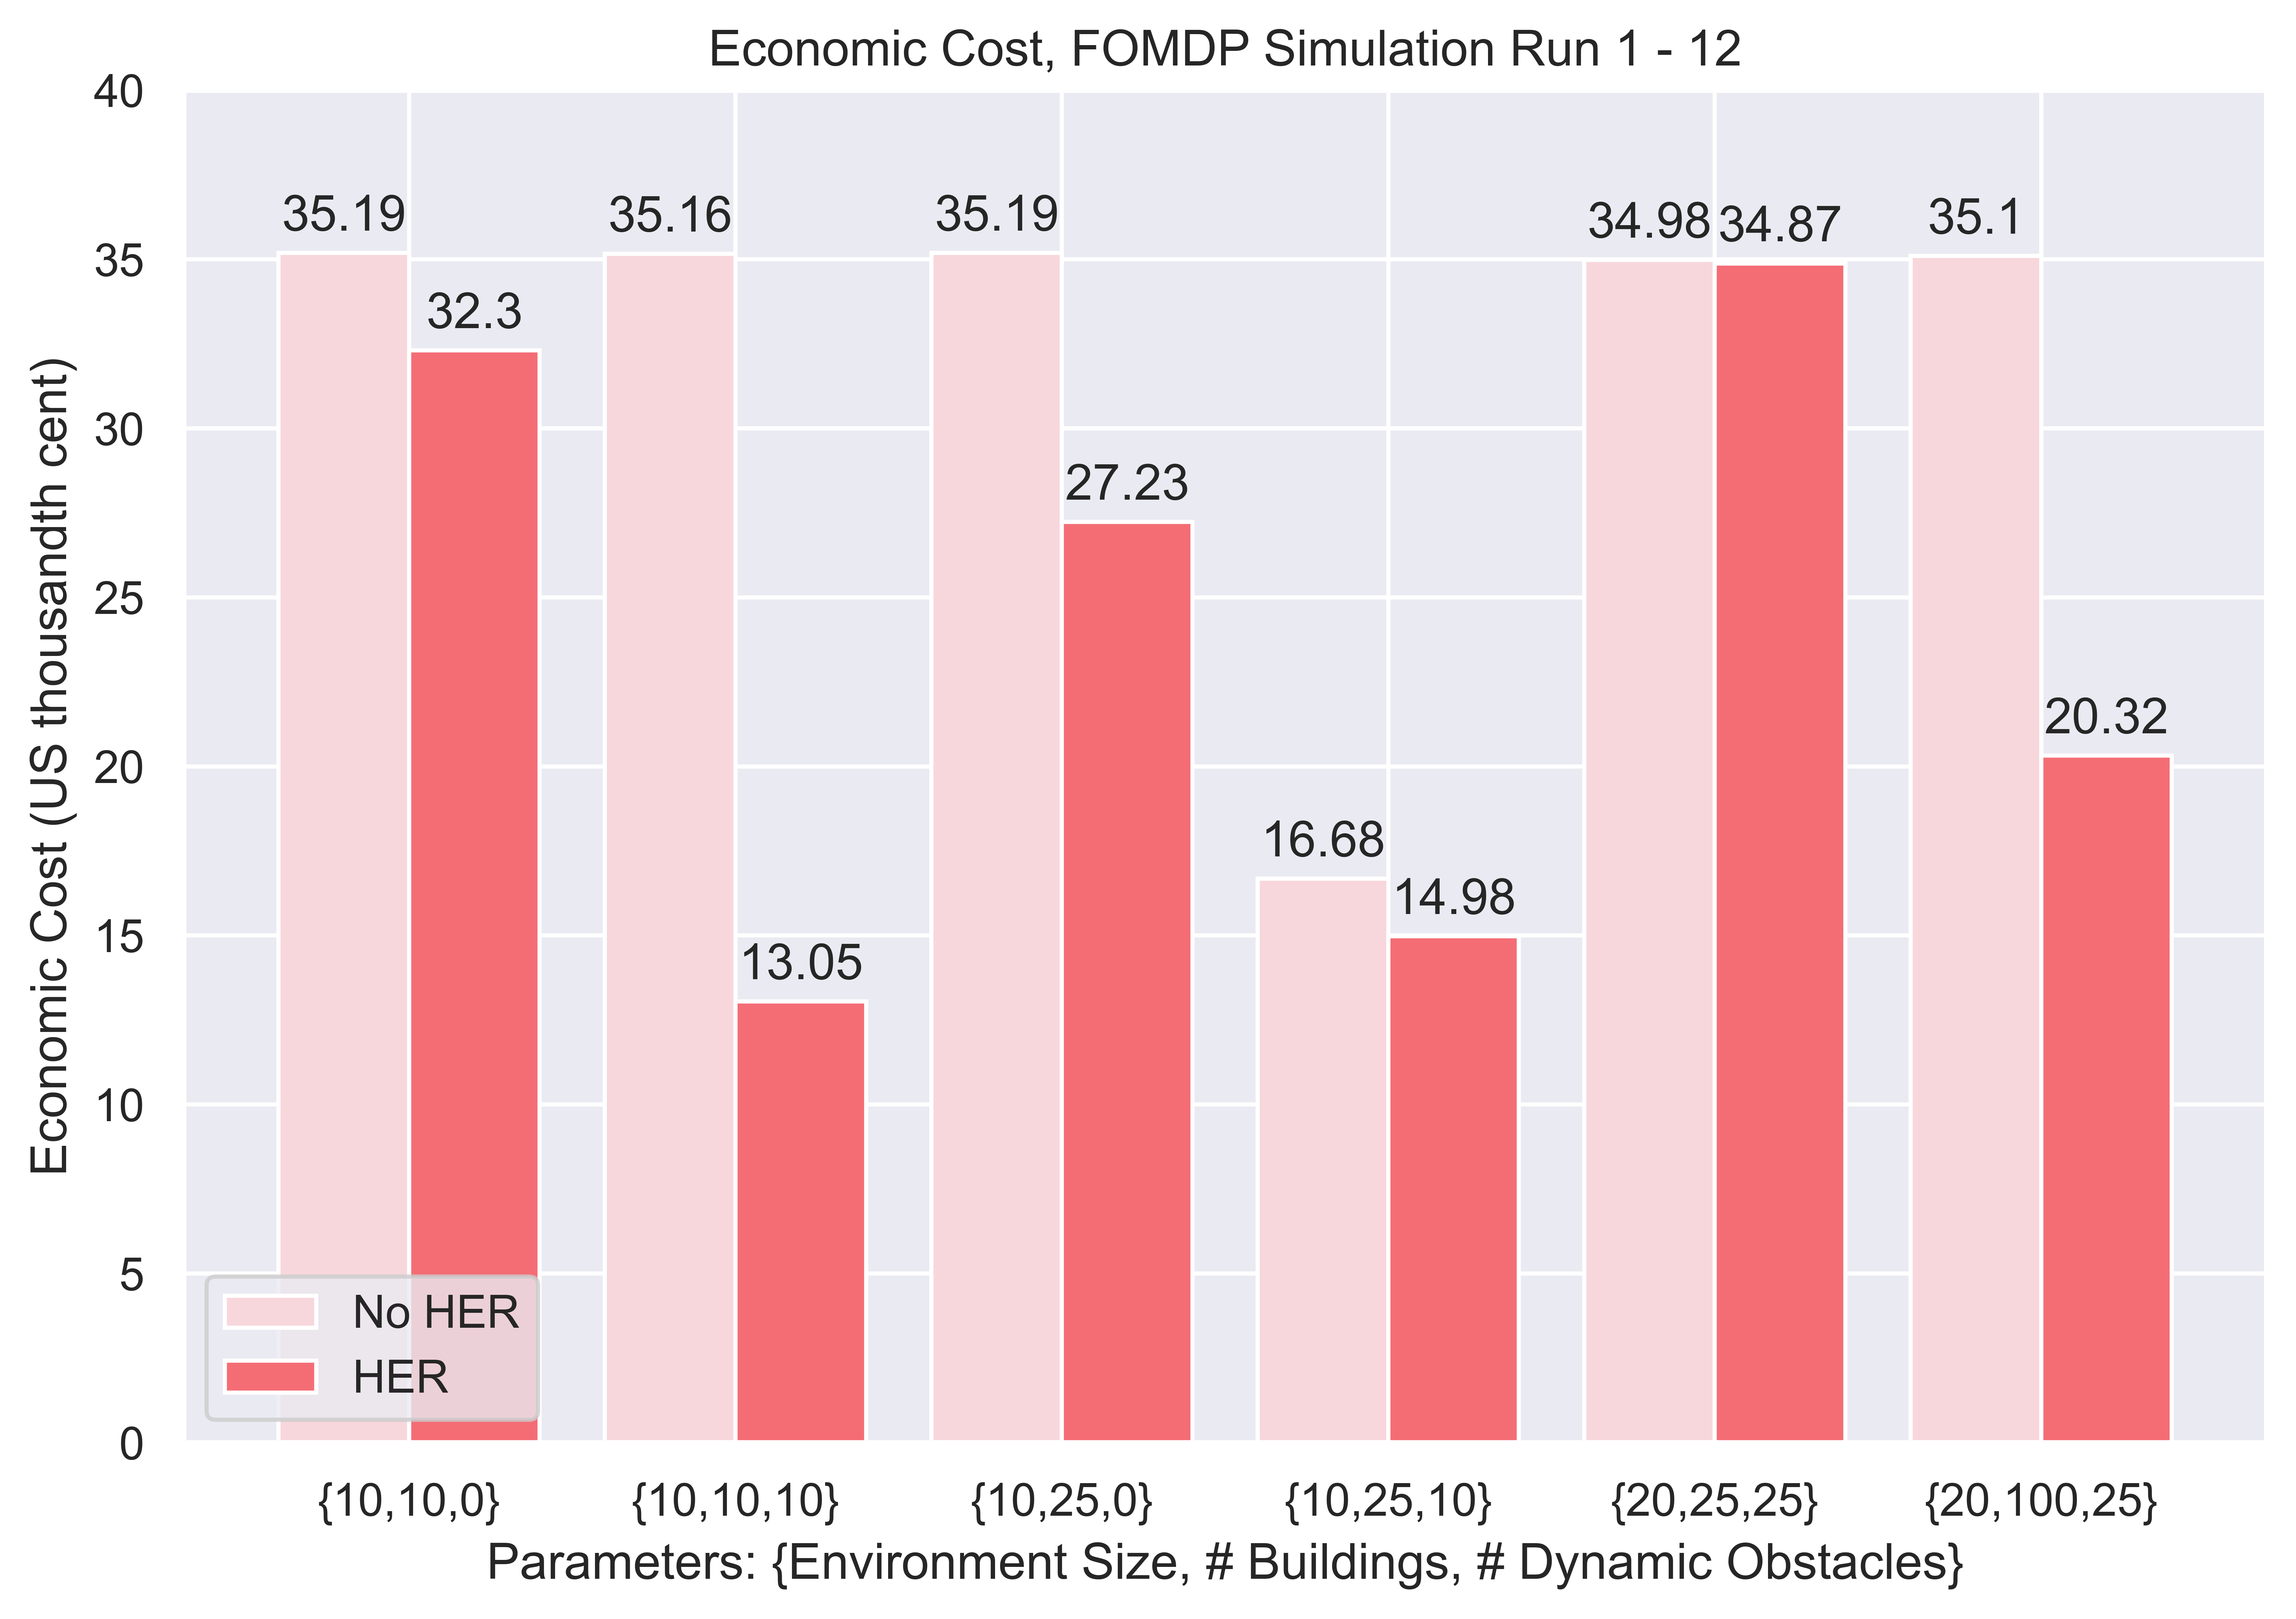

In [224]:
labels = ['{10,10,0}', '{10,10,10}', '{10,25,0}', '{10,25,10}', '{20,25,25}', '{20,100,25}']

valuesA = [0.03519, 0.03516, 0.03519, 0.01668, 0.03498, 0.03510]
valuesB = [0.03230, 0.01305, 0.02723, 0.01498, 0.03487, 0.02032]

valuesA = [v*1000 for v in valuesA]
valuesB = [v*1000 for v in valuesB]

plt.figure(figsize=(9, 6), dpi=980)

x = np.arange(len(labels))
width = 0.4
plt.xticks(x, labels)

rectsA = plt.bar(x - width/2, valuesA, width, label='No HER', color='#f7d7dc')
rectsB = plt.bar(x + width/2, valuesB, width, label='HER', color='#f46d75')

plt.bar_label(rectsA, padding=3)
plt.bar_label(rectsB, padding=3)

plt.legend(loc=3)
plt.ylabel('Economic Cost (US thousandth cent)')
plt.ylim([0, 40])
plt.xlabel('Parameters: {Environment Size, # Buildings, # Dynamic Obstacles}')
plt.title(f"Economic Cost, FOMDP Simulation Run 1 - 12")
plt.savefig(f"FOMDP_cost.png", dpi=960)

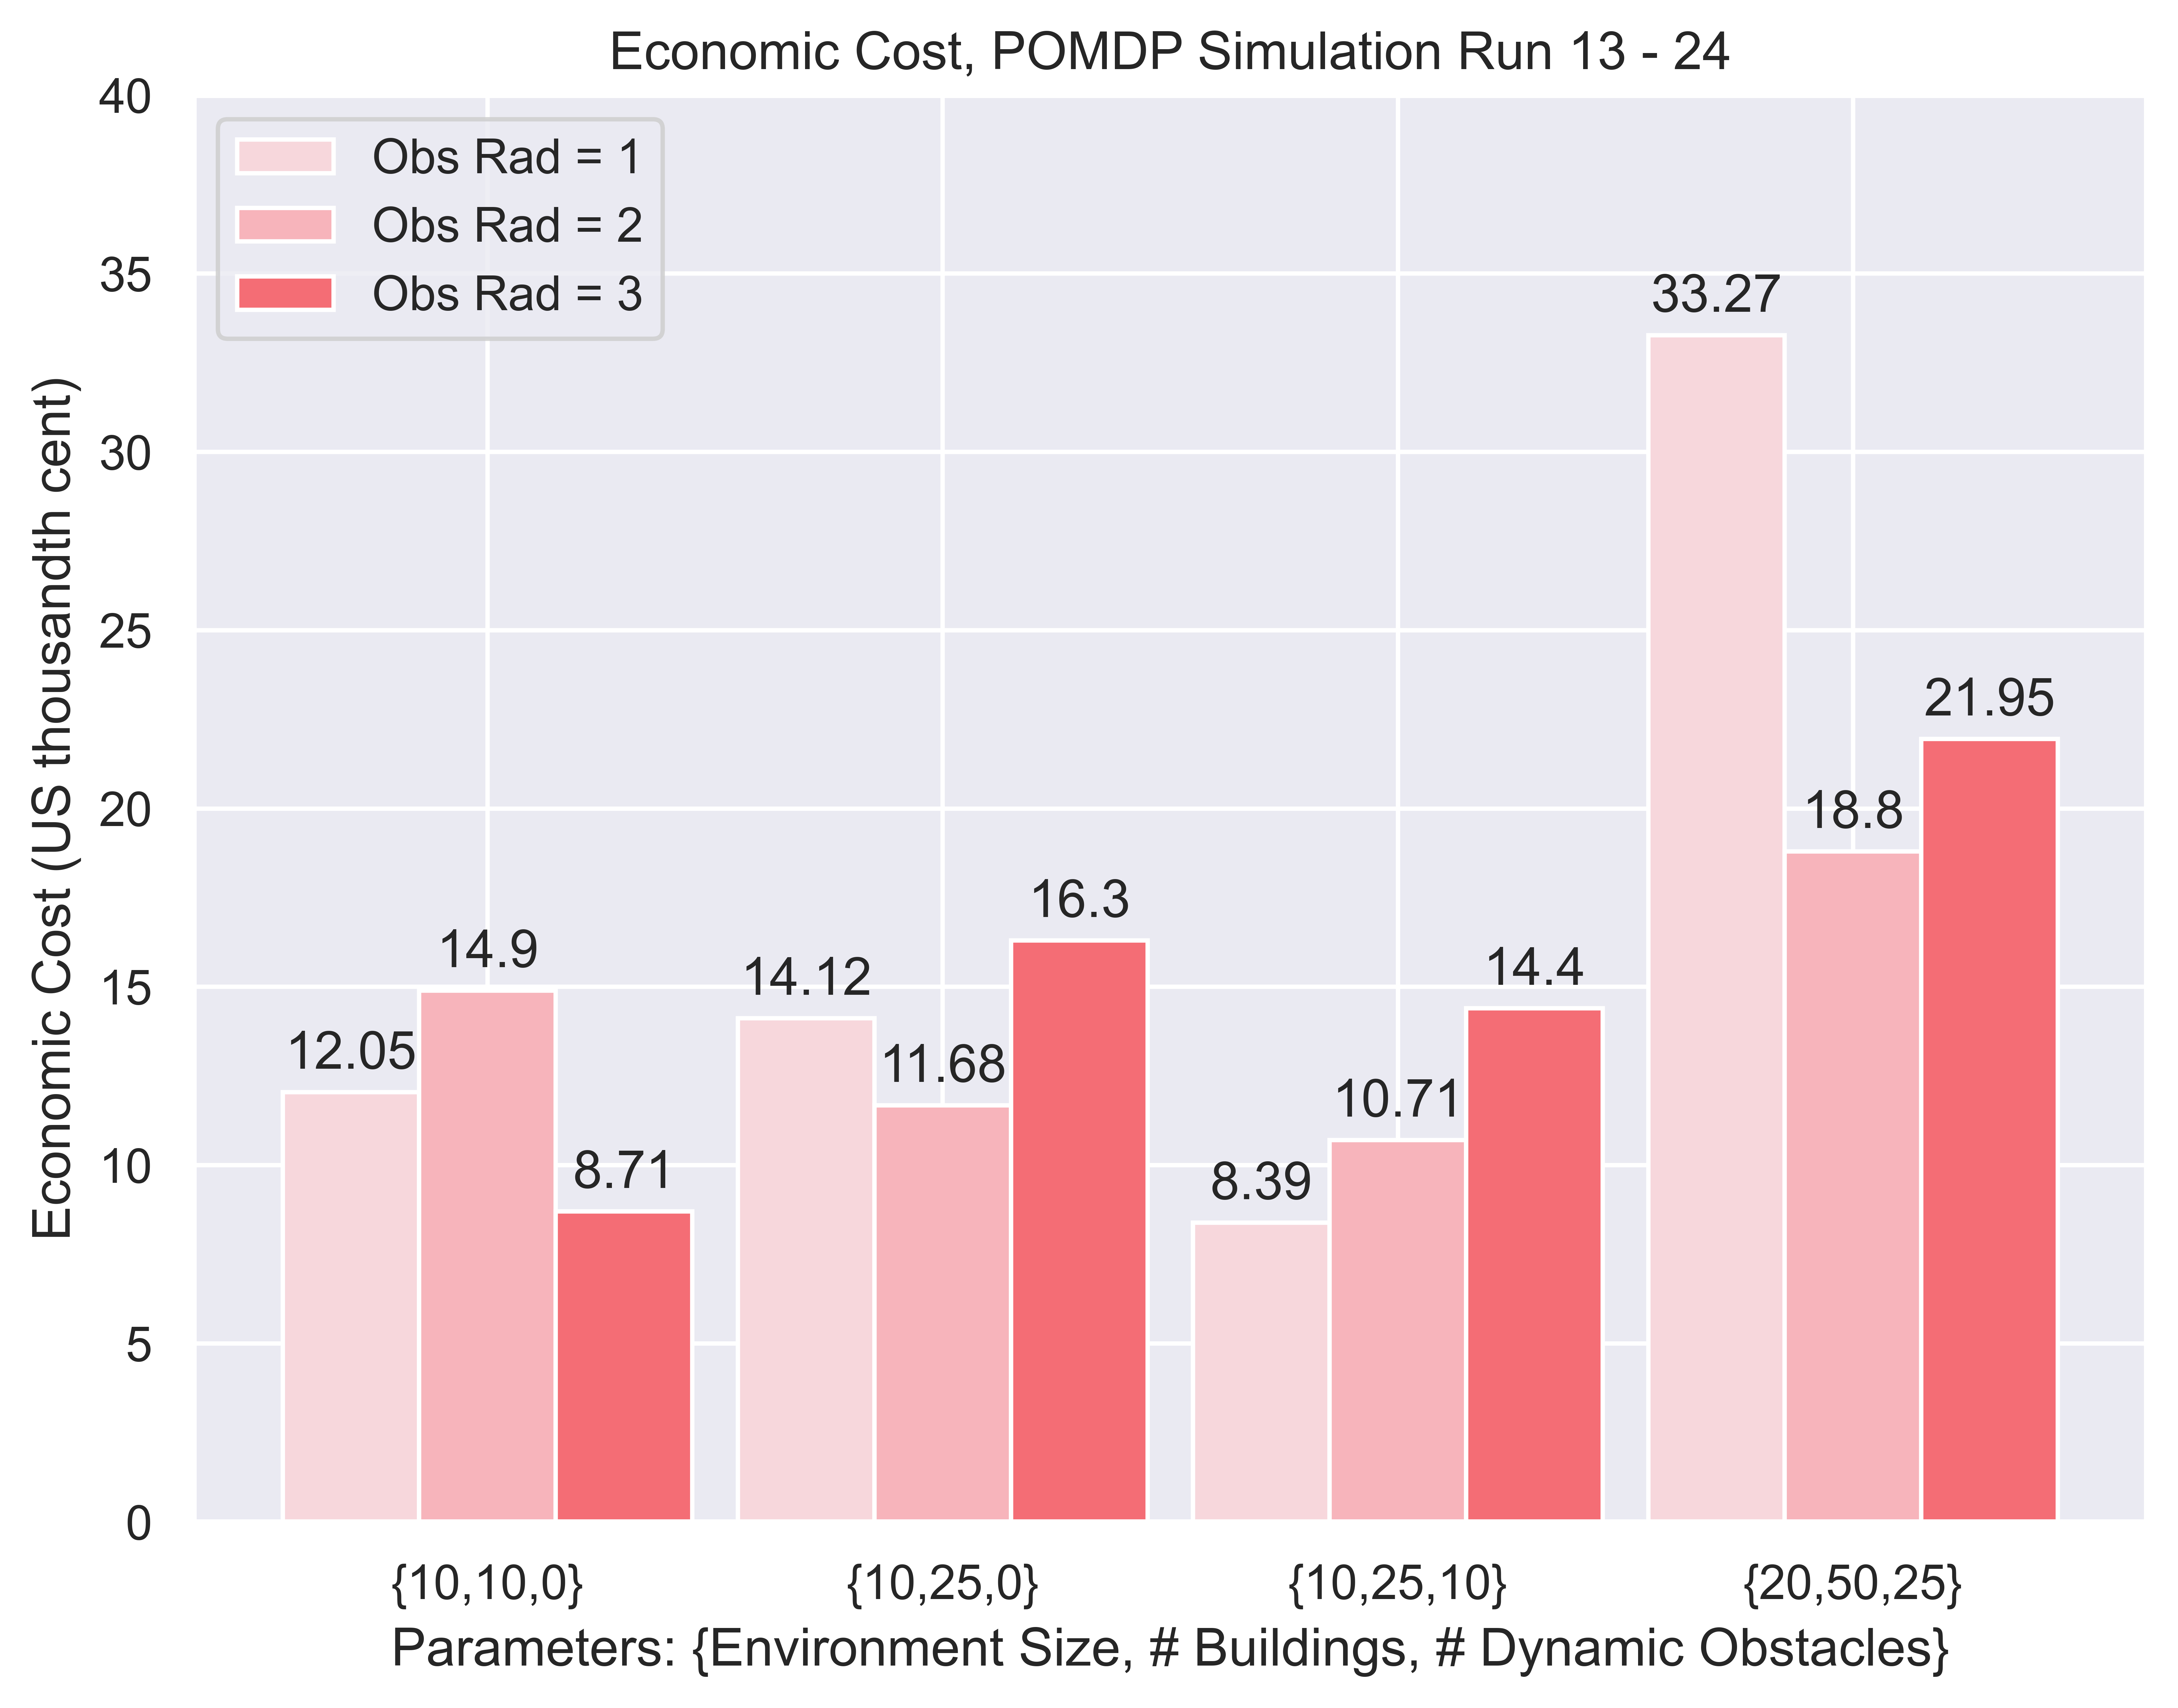

In [225]:
labels = ['{10,10,0}', '{10,25,0}', '{10,25,10}', '{20,50,25}']

values1 = [0.01205,0.01412,0.00839,0.03327]
values2 = [0.01490,0.01168,0.01071,0.01880]
values3 = [0.00871,0.01630,0.01440,0.02195]

values1 = [v*1000 for v in values1]
values2 = [v*1000 for v in values2]
values3 = [v*1000 for v in values3]

plt.figure(figsize=(8, 6), dpi=980)

x = np.arange(len(labels))
width = 0.3
plt.xticks(x, labels)

rects1 = plt.bar(x - width, values1, width, label='Obs Rad = 1', color='#f7d7dc')
rects2 = plt.bar(x, values2, width, label='Obs Rad = 2', color='#f7b4bb')
rects3 = plt.bar(x + width, values3, width, label='Obs Rad = 3', color='#f46d75')

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)
plt.bar_label(rects3, padding=3)

plt.legend()
plt.ylabel('Economic Cost (US thousandth cent)')
plt.ylim([0, 40])
plt.xlabel('Parameters: {Environment Size, # Buildings, # Dynamic Obstacles}')
plt.title(f"Economic Cost, POMDP Simulation Run 13 - 24")
plt.savefig(f"POMDP_cost.png", dpi=960)

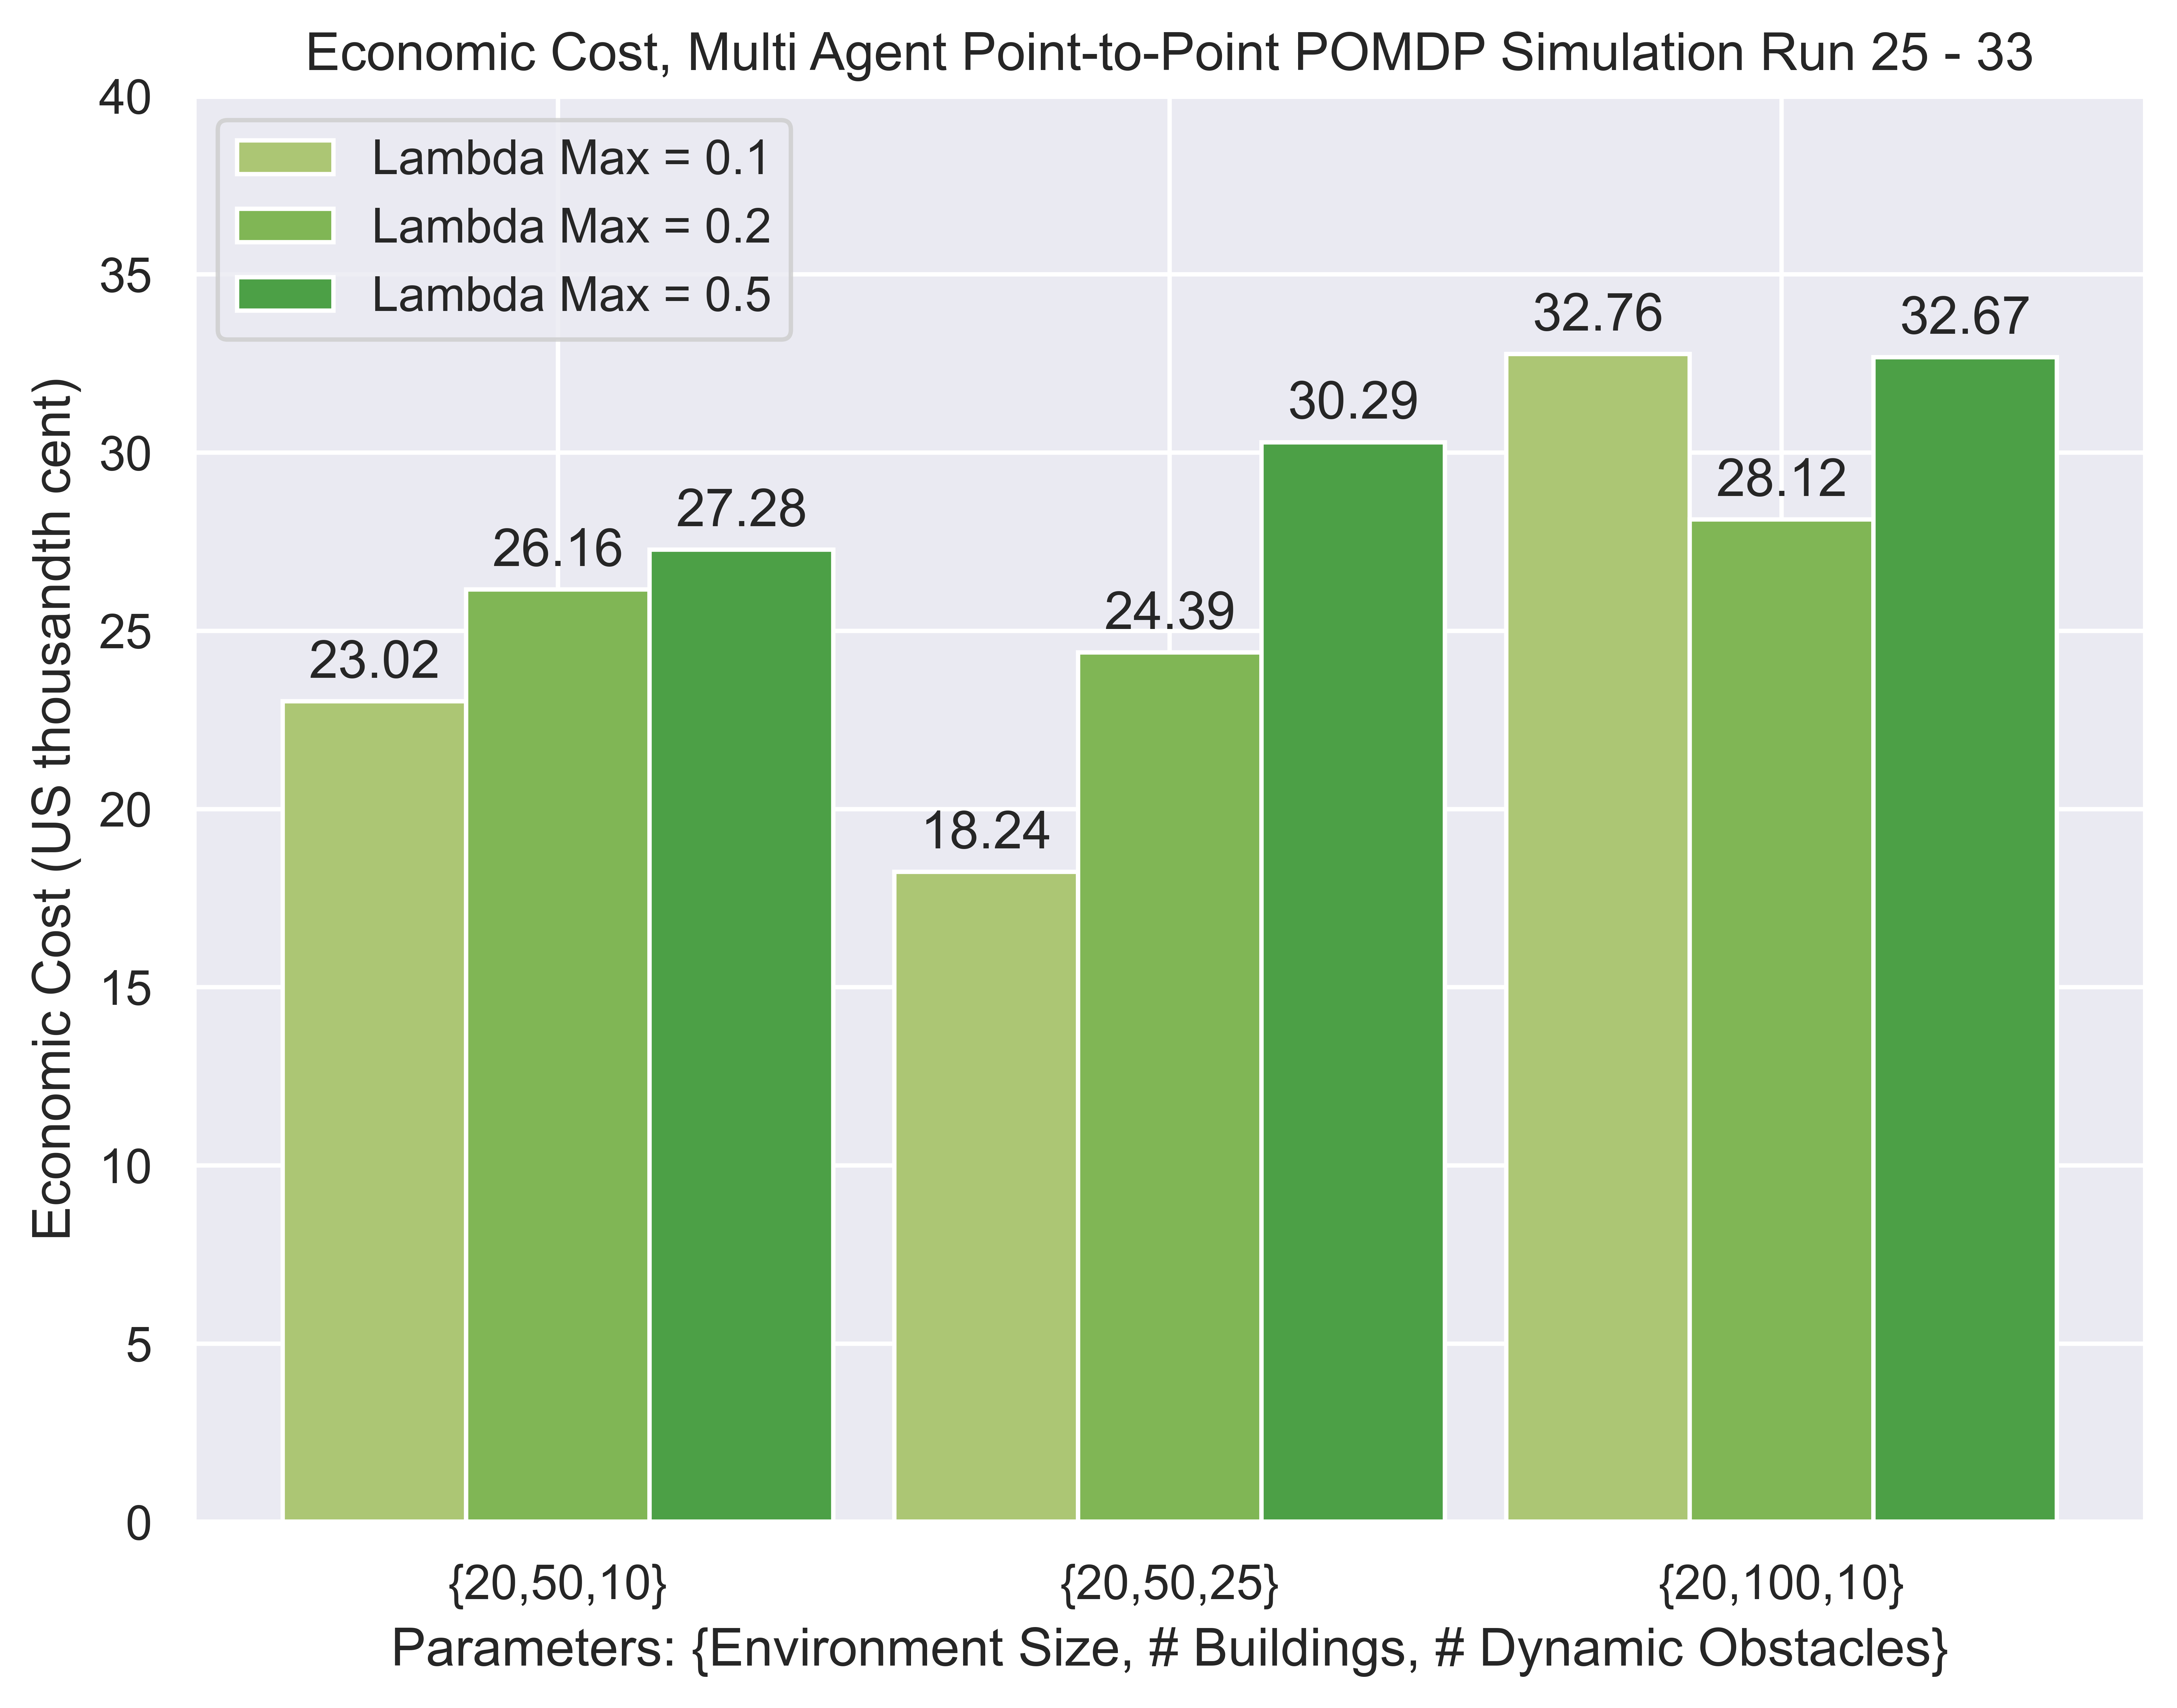

In [107]:
labels = ['{20,50,10}', '{20,50,25}', '{20,100,10}']

values1 = [0.02302, 0.01824, 0.03276]
values2 = [0.02616, 0.02439, 0.02812]
values3 = [0.02728, 0.03029, 0.03267]

values1 = [v*1000 for v in values1]
values2 = [v*1000 for v in values2]
values3 = [v*1000 for v in values3]

plt.figure(figsize=(8, 6), dpi=980)

x = np.arange(len(labels))
width = 0.3 
plt.xticks(x, labels)

rects1 = plt.bar(x - width, values1, width, label='Lambda Max = 0.1', color='#acc674')
rects2 = plt.bar(x, values2, width, label='Lambda Max = 0.2', color='#80b655')
rects3 = plt.bar(x + width, values3, width, label='Lambda Max = 0.5', color='#4ca046')

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)
plt.bar_label(rects3, padding=3)

plt.legend(loc=2)
plt.ylabel('Economic Cost (US thousandth cent)')
plt.ylim([0, 40])
plt.xlabel('Parameters: {Environment Size, # Buildings, # Dynamic Obstacles}')
plt.title(f"Economic Cost, Multi Agent Point-to-Point POMDP Simulation Run 25 - 33")
plt.savefig(f"P2P_cost.png", dpi=960)

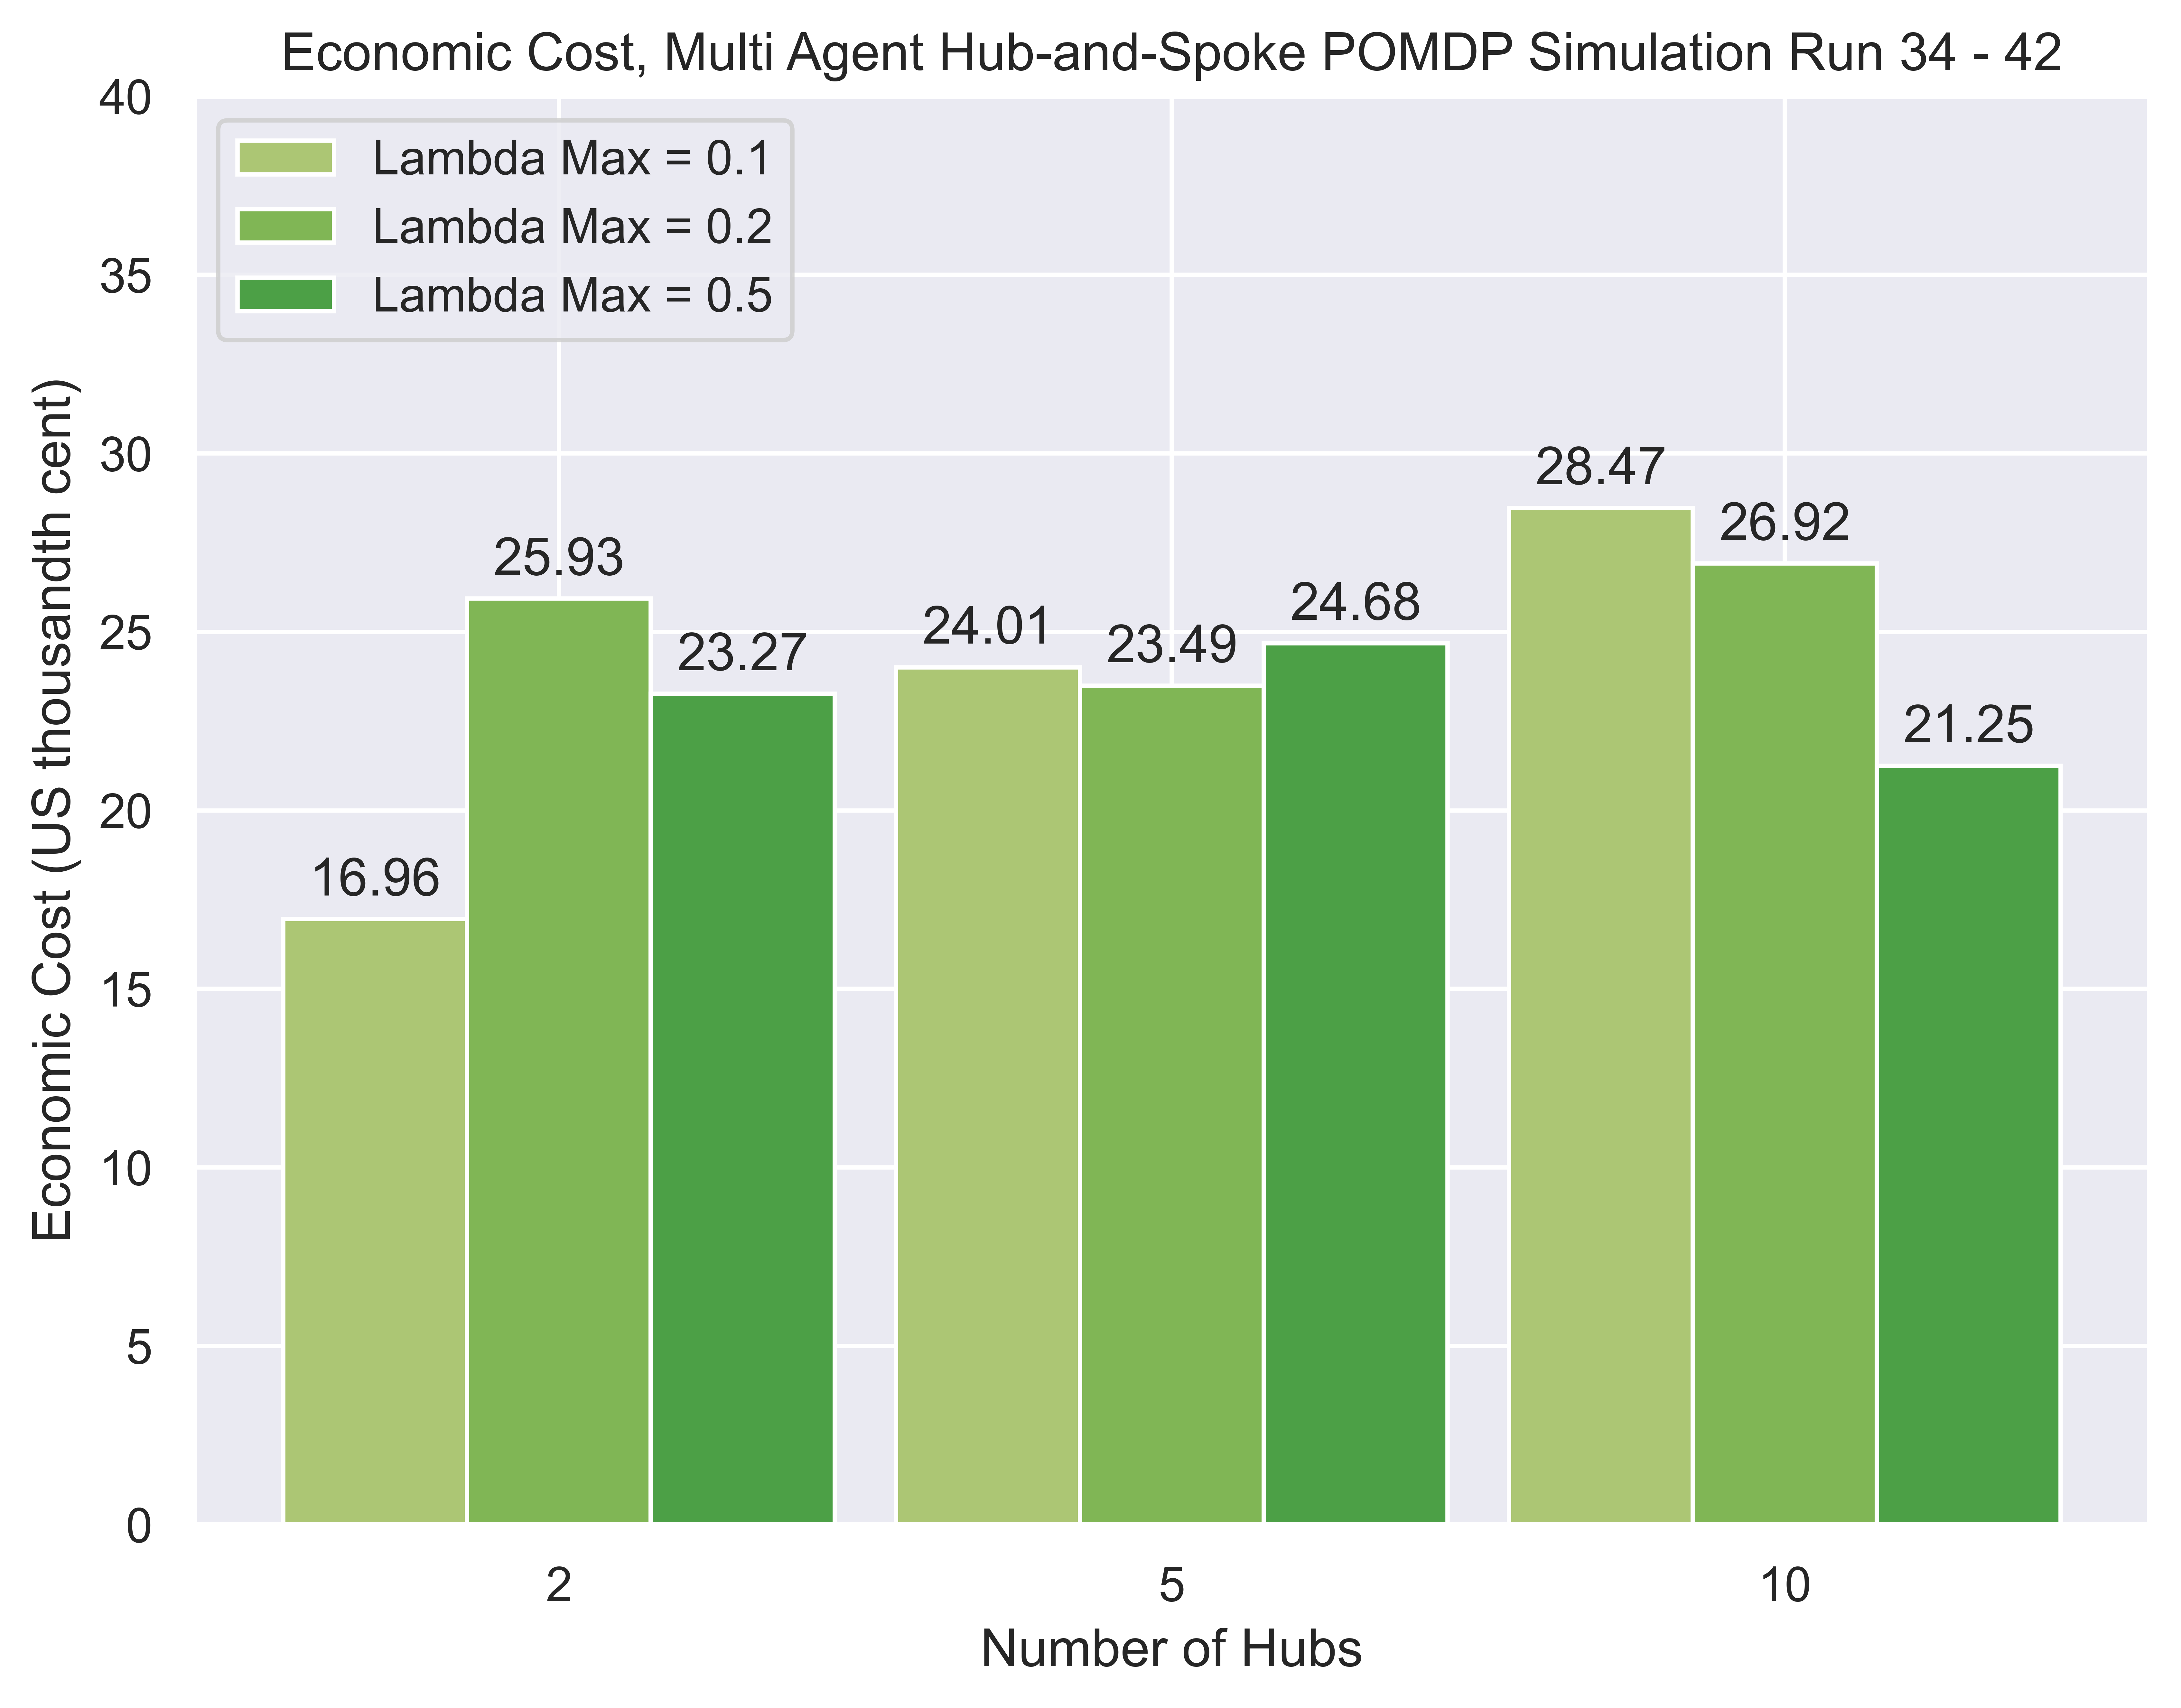

In [231]:
labels = ['2', '5', '10']

values1 = [0.01696, 0.02401, 0.02847]
values2 = [0.02593, 0.02349, 0.02692]
values3 = [0.02327, 0.02468, 0.02125]

values1 = [v*1000 for v in values1]
values2 = [v*1000 for v in values2]
values3 = [v*1000 for v in values3]

plt.figure(figsize=(8, 6), dpi=980)

x = np.arange(len(labels))
width = 0.3 
plt.xticks(x, labels)

rects1 = plt.bar(x - width, values1, width, label='Lambda Max = 0.1', color='#acc674')
rects2 = plt.bar(x, values2, width, label='Lambda Max = 0.2', color='#80b655')
rects3 = plt.bar(x + width, values3, width, label='Lambda Max = 0.5', color='#4ca046')

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)
plt.bar_label(rects3, padding=3)

plt.legend(loc=2)
plt.ylabel('Economic Cost (US thousandth cent)')
plt.ylim([0, 40])
plt.xlabel('Number of Hubs')
plt.title(f"Economic Cost, Multi Agent Hub-and-Spoke POMDP Simulation Run 34 - 42")
plt.savefig(f"HAS_cost.png", dpi=960)

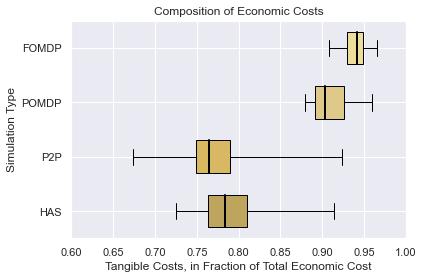

In [243]:
values1 = [0.9629031663082296, 0.9420243126704922, 0.9431073110002587, 0.91283402052706, 0.9658217757512821, 0.9350350825966035, 0.9081095021010983, 0.9416212652347866]
values2 = [0.9004434763748574, 0.9079775826992909, 0.8914874095405771, 0.8918583839946959, 0.8949061621122207, 0.9176746184202729, 0.8787521661487981, 0.8889680027401529, 0.9053380614608766, 0.95927026396195, 0.9513965844565989, 0.9497128386817684]
values3 = [0.7316376681353058, 0.771786334540665, 0.6736960333974518, 0.7504216239100078, 0.7505098807350018, 0.7518159268619277, 0.8220506783037268, 0.7456404537967953, 0.7497589140127258, 0.9145919766514015, 0.7471112099288154, 0.7945368769857974, 0.7554329555938097, 0.798448178543826, 0.7489245203443479, 0.7511844986106248, 0.7361985564625448, 0.7851264233065607, 0.7138238194095368, 0.7671953337254215, 0.7651079142286002, 0.9001835096709607, 0.7585334630517611, 0.8160994253758778, 0.7485592166250115, 0.7914070426712567, 0.7274414946435384, 0.7449954191973972, 0.7520013244961332, 0.7605366766776321, 0.7717697877961907, 0.7521746369087337, 0.7876237706858408, 0.9013521251384957, 0.7658401574635231, 0.804235772130395, 0.7549911613335989, 0.7825358016027218, 0.737283243548467, 0.7599375466055381, 0.7276040848930608, 0.7654339342811703, 0.8226182065275692, 0.7466690113812682, 0.7779746117233537, 0.8940209641069019, 0.7548211500290751, 0.80103351422982, 0.7585089427664478, 0.7859748835174791, 0.7652432350921899, 0.7387219560006163, 0.805031585008738, 0.7698203393047899, 0.7420205056040824, 0.7172142495925823, 0.7868051989164994, 0.9038045382766063, 0.7452212872807626, 0.78338151430259, 0.744384589229647, 0.757807782187427, 0.7089472631146329, 0.760964512878444, 0.7388363165906625, 0.7607393100708354, 0.7160289077249198, 0.7458221184359743, 0.7556223878602566, 0.9057023898644924, 0.7435967086662124, 0.8091929875615749, 0.7642316286913732, 0.8267846343992481, 0.7376354365928808, 0.7705392358968102, 0.7528112653595838, 0.7465889983377845, 0.7833969143220157, 0.7701655434861997, 0.8030169792861965, 0.9240598589600189, 0.7641923377582728, 0.8322750729658865, 0.7751792683553322, 0.8013513634187162, 0.7390138239066144, 0.7325469992237876, 0.7376143036768605, 0.7552358818956884, 0.7674530238109765, 0.7788847750931526, 0.8034221645327821, 0.9115075684273717, 0.7724454937934674, 0.8314791807171162, 0.7713731988215986, 0.7900363616316789, 0.7541832724774722, 0.7718631581547787, 0.7592606431236542, 0.7938848471275117, 0.7599434922401062, 0.7710426691698308, 0.7970101205101682]
values4 = [0.8091151367997151, 0.7952406784208904, 0.7885899240094498, 0.7792831265525826, 0.8445158889702395, 0.7807569896440264, 0.765101422842135, 0.8000485788855232, 0.7758852724359666, 0.9060083351228473, 0.7841307840195423, 0.8461154680687359, 0.7476432094882364, 0.7968345703656406, 0.8168580222547431, 0.7960500808229459, 0.7669376950652648, 0.7998114912482494, 0.7459431360474239, 0.7775776865881651, 0.7505472632712887, 0.8783526351407703, 0.7936055622745566, 0.8454155251013554, 0.7597536945353188, 0.7802153476870697, 0.7905303556302348, 0.7758669991739646, 0.7624199967075963, 0.8124303151264453, 0.8030468996752355, 0.7382371403183173, 0.7532525749689197, 0.8846487470521944, 0.7575771681902105, 0.850178216779409, 0.7569738133890564, 0.8106182427266917, 0.7582757559443338, 0.7826848303132705, 0.7767921204885598, 0.8075482795552752, 0.8498606822987772, 0.7671380904109697, 0.7526803465052349, 0.9135703802886745, 0.7930546747834384, 0.8521470839240022, 0.7717038879436874, 0.816966025200163, 0.7713904949237921, 0.78930576792277, 0.7625337585697217, 0.7859337564127908, 0.7919334959440483, 0.7790073154563507, 0.7605239409478982, 0.9069045279908737, 0.7507951442840132, 0.8470032955630632, 0.7344578458232454, 0.7919896282354619, 0.7501829503953652, 0.7870908376209649, 0.7412182438490192, 0.8003385478961869, 0.8119405546775481, 0.7730770811304445, 0.7754415989565675, 0.8980488311688664, 0.7574718679671504, 0.8627501822438535, 0.7773312259370458, 0.7802243512913167, 0.7427973508862493, 0.7883853762812001, 0.7247203763911435, 0.7935733060978306, 0.7835671190161234, 0.7802106563644817, 0.8065933654956804, 0.9082074804151472, 0.8123420722226705, 0.8200894654085398, 0.7919705602170215, 0.7984038958780342, 0.7278013895060181, 0.7939494919758179, 0.7332431524947475, 0.7791028199175207, 0.8123362381012593, 0.768501600406733, 0.7708583381070057, 0.9035739184486277, 0.74890104105345, 0.8495374548332051, 0.7361896772143885, 0.8265334232046295, 0.7783079344195412, 0.7699583267913204, 0.7497616967980032, 0.7768561030089224, 0.8012100745782844, 0.751380457809466, 0.7608944521100038, 0.8893043337608888]

box1 = plt.boxplot(values1, vert=False, patch_artist=True, positions=[4], whis=10, widths=0.6)
plt.setp(box1["boxes"], facecolor="#eedc9a")
plt.setp(box1["medians"], color="black", lw=2)
box2 = plt.boxplot(values2, vert=False, patch_artist=True, positions=[3], whis=10, widths=0.6)
plt.setp(box2["boxes"], facecolor="#dfc98a")
plt.setp(box2["medians"], color="black", lw=2)
box3 = plt.boxplot(values3, vert=False, patch_artist=True, positions=[2], whis=10, widths=0.6)
plt.setp(box3["boxes"], facecolor="#d8b863")
plt.setp(box3["medians"], color="black", lw=2)
box4 = plt.boxplot(values4, vert=False, patch_artist=True, positions=[1], whis=10, widths=0.6)
plt.setp(box4["boxes"], facecolor="#bda55d")
plt.setp(box4["medians"], color="black", lw=2)

plt.ylabel('Simulation Type')  # Add an x-label to the axes.
plt.xlabel('Tangible Costs, in Fraction of Total Economic Cost')
plt.title(f"Composition of Economic Costs")  # Add a title to the axes.

plt.yticks([4,3,2,1], ["FOMDP","POMDP","P2P", "HAS"])
plt.xlim([0.6,1])

plt.savefig(f"tangible_costs.png", dpi=960)
plt.show()


In [202]:
with open(f'temp.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')


    for run in range(1,25):

        rewards = []
        lengths = []
        with open(f'{run}_test.csv') as file:
            myreader = csv.reader(file)
            for i in myreader:
                rewards.append(float(i[0]))
                lengths.append(float(i[1]))

        avg_distance = statistics.mean([l for l in lengths]) * DELTA_X_M
        standard_dev = statistics.stdev([l for l in lengths]) * DELTA_X_M
        perc_90 = np.percentile([l for l in lengths], 90) * DELTA_X_M
        perc_50 = np.percentile([l for l in lengths], 50) * DELTA_X_M
        print(f"Run {run}")
        print(f"Average Time = {avg_distance / 10}")
        print(f"Std Dev Time = {standard_dev / 10}")
        print(f"50%-90% Time = {perc_90-perc_50 / 10}")

        avg_cost_t = ELECTRIC_COST / 1000 * (avg_distance)
        print(f"Average Tangible Cost = {avg_cost_t}")
        avg_cost = avg_cost_t + standard_dev / VELOCITY * (VOR_HR / 3600)
        print(f"Average Cost = {avg_cost}, Percentage Tangible = {avg_cost_t/avg_cost}")
        
        mywriter.writerow((run, avg_distance / 10, standard_dev / 10, avg_cost, avg_cost_t/avg_cost))
        
with open(f'temp2.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')

    for MODEL_NAME in range(25,43):
        
        print(MODEL_NAME)
        store = []
        average = [[0,0,0,0],[0,0,0,0],[0,0,0,0]]
        for agent in range(13,25):

            rewards = []
            lengths = []
            
            with open(f'Test_{agent}-Model_{MODEL_NAME}.csv') as file:
                myreader = csv.reader(file)
                for i in myreader:
                    rewards.append(float(i[0]))
                    lengths.append(float(i[1]))

            ELECTRIC_COST = 0.172625
            VOR_HR = 1.308
            DELTA_X_M = 2
            DELTA_T_S = 0.2
            VELOCITY = DELTA_X_M/DELTA_T_S

            import statistics
            
            avg_distance = statistics.mean(lengths) * DELTA_X_M
            standard_dev = statistics.stdev(lengths) * DELTA_X_M
            perc_90 = np.percentile(lengths, 90) * DELTA_X_M
            perc_50 = np.percentile(lengths, 50) * DELTA_X_M

            print(f"Average Time = {avg_distance / 10}")
            print(f"Std Dev Time = {standard_dev / 10}")

            avg_cost_t = ELECTRIC_COST / 1000 * (avg_distance)
            print(f"Average Tangible Cost = {avg_cost_t}")
            avg_cost = avg_cost_t + standard_dev / VELOCITY * (VOR_HR / 3600)
            print(f"Average Cost = {avg_cost}, Percentage Tangible = {avg_cost_t/avg_cost}")
            store.append(str(avg_cost)[:7])
        
        for x in range(4):
            for y in range(3):
                average[y][x] = store[x*3+y]

        for z in average:
            mywriter.writerow(z)

Run 1
Average Time = 20.0516
Std Dev Time = 1.592241398994723
Average Tangible Cost = 0.0346140745
Average Cost = 0.03519258887496808, Percentage Tangible = 0.9835614715068727
Run 2
Average Time = 17.4132
Std Dev Time = 6.16819847544098
Average Tangible Cost = 0.0300595365
Average Cost = 0.03230064861274356, Percentage Tangible = 0.9306171173336942
Run 3
Average Time = 19.9476
Std Dev Time = 2.00878307675305
Average Tangible Cost = 0.034434544500000004
Average Cost = 0.03516440235122028, Percentage Tangible = 0.9792444118932979
Run 4
Average Time = 6.1448
Std Dev Time = 6.729659819135085
Average Tangible Cost = 0.010607461
Average Cost = 0.013052570734285748, Percentage Tangible = 0.8126721713246056
Run 5
Average Time = 20.0208
Std Dev Time = 1.7330697882344182
Average Tangible Cost = 0.034560906
Average Cost = 0.03519058802305851, Percentage Tangible = 0.9821065217027374
Run 6
Average Time = 14.096
Std Dev Time = 7.9846940667341375
Average Tangible Cost = 0.024333220000000003
Average 

In [ ]:
for MODEL_NAME in range(1,25):

    rewards = []
    lengths = []

    with open(f'{MODEL_NAME}_test.csv') as file:
        myreader = csv.reader(file)
        for j in myreader:
            rewards.append(float(j[0]))
            lengths.append(float(j[1]))



    # avg_distance = statistics.mean([l for l in lengths if l != 101]) * DELTA_X_M
    # standard_dev = statistics.stdev([l for l in lengths if l != 102]) * DELTA_X_M
    # perc_90 = np.percentile([l for l in lengths if l != 101], 90)
    # perc_50 = np.percentile([l for l in lengths if l != 101], 50)
    
    

    sns.set(palette="flare")
    plt.hist([r for r in rewards if r > 0], density=True, bins=50)
    plt.ylabel('Freq')
    plt.xlabel('Reward')
    if MODEL_NAME not in [9,10,11,12,22,23,24]:
        plt.xlim([0,0.9])
    else:
        plt.xlim([0,0.8])
    plt.ylim([0,20])
    plt.title(f"Run {MODEL_NAME}: Avg Reward = {sum(rewards)/len(rewards):.3f}")
    plt.savefig(f"reward_graphs/{MODEL_NAME}_reward.png", dpi=960)
    plt.show()

In [ ]:
terrain_in = Input(shape=(10,10,10,1), name="TerrainInput")

x = Conv3D(32, (2,2,2), activation="relu", name="Conv1a")(terrain_in)
x = Conv3D(32, (2,2,2), activation="relu", name="Conv1b")(x)
x = MaxPooling3D((2,2,2), padding='same', name="MaxPool1")(x)
x = Dropout(0.1, name="Dropout1")(x)

x = Conv3D(64, (2,2,2), activation="relu", name="Conv2a")(x)
x = Conv3D(64, (2,2,2), activation="relu", name="Conv2b")(x)
terrain_out = Flatten(name="Flatten2")(x)

goal_in = Input(shape=(3), name="VectorInput")
goal_out = (Dense(64, activation='relu', name="FC1"))(goal_in)

concat = concatenate([terrain_out, goal_out], name="Concat")
x = (Dense(128, activation='relu', name="FC2"))(concat)
x = (Dense(128, activation='relu', name="FC3"))(x)
model_out = (Dense(6, activation='linear', name="Output"))(x)

model = Model([terrain_in, goal_in], model_out, name="FOMDP")

model.compile(loss=tf.keras.losses.Huber(), optimizer=Adam(learning_rate=LEARNING_RATE))

model.summary()

# tf.keras.utils.plot_model(model, show_shapes=True)

terrain_in = Input(shape=(7**3), name="TerrainInput")
x = (Dense(128, activation='relu', name="FC1a"))(terrain_in)
x = (Dense(128, activation='relu', name="FC1b"))(x)
x = (Dense(128, activation='relu', name="FC1c"))(x)
x = Dropout(0.1, name="Dropout1")(x)

x = (Dense(256, activation='relu', name="FC2a"))(x)
x = (Dense(256, activation='relu', name="FC2b"))(x)
terrain_out = (Dense(256, activation='relu', name="FC2c"))(x)

goal_in = Input(shape=(3), name="VectorInput")
goal_out = (Dense(64, activation='relu', name="FC3"))(goal_in)

concat = concatenate([terrain_out, goal_out], name="Concat")
x = (Dense(256, activation='relu', name="FC4"))(concat)
x = (Dense(256, activation='relu', name="FC5"))(x)
x = (Dense(128, activation='relu', name="FC6"))(x)
model_out = (Dense(6, activation='linear', name="Output"))(x)

model = Model([terrain_in, goal_in], model_out, name="POMDP")

model.compile(loss=tf.keras.losses.Huber(), optimizer=Adam(learning_rate=LEARNING_RATE))

# tf.keras.utils.plot_model(model, show_shapes=True)

model.summary()